In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
import pickle
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
df=pd.read_csv("sign_language_data.csv")
df.sample(5)

,Landmark_0,Landmark_1,Landmark_2,Landmark_3,Landmark_4,Landmark_5,Landmark_6,Landmark_7,Landmark_8,Landmark_9,...,Landmark_54,Landmark_55,Landmark_56,Landmark_57,Landmark_58,Landmark_59,Landmark_60,Landmark_61,Landmark_62,Label
47400,0.698642,0.684540,1.588874e-07,0.707774,0.503473,-0.026272,0.676753,0.361692,-0.028606,0.649683,...,0.434341,0.596612,-0.033400,0.516234,0.611707,-0.007451,0.524865,0.620339,0.021593,থ
52868,0.591361,0.147750,4.789252e-07,0.523025,0.184185,-0.134940,0.482697,0.306151,-0.184313,0.492444,...,0.621724,0.554400,-0.046862,0.637635,0.621195,-0.068611,0.648888,0.687072,-0.081929,ফ
60041,0.676622,0.718360,7.343451e-08,0.572684,0.673282,-0.010001,0.502407,0.625990,-0.007745,0.440696,...,0.474762,0.519214,-0.027693,0.453576,0.549965,-0.038329,0.444014,0.584703,-0.044686,হ
17858,0.376849,0.747204,7.445764e-07,0.298564,0.657545,-0.032919,0.271201,0.539506,-0.049651,0.274211,...,0.503368,0.463639,-0.043432,0.509776,0.400492,-0.041714,0.512879,0.357645,-0.037210,আ
107749,0.479130,0.778147,-3.484772e-07,0.271938,0.671403,-0.018876,0.176365,0.515622,-0.027455,0.183979,...,0.560382,0.282933,-0.063717,0.529746,0.213755,-0.077839,0.503146,0.172143,-0.084727,O


In [6]:
df.Label.unique()

array(['ভালোবাসি', 'বুঝলাম', 'ধন্যবাদ', 'দীর্ঘ', 'hello', 'জ্বী', 'খারাপ',
       'খুশি', 'না', 'সাহায্য', 'সময়', 'টাকা', 'ভালো', '0', '1', '2', '৩',
       '4', '5', '৬', '৭', '৮', '৯', 'অ/য়', 'আ', 'ই/ঈ', 'উ/ঊ', 'ঋ/র/ড়/ঢ়',
       'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ/ক্ষ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ/য',
       'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ/ন', 'ত', 'থ', 'দ', 'ধ', 'প', 'ফ',
       'ব', 'ম', 'ল', 'শ/ষ/স', 'হ', 'ং', 'ঃ', 'ঁ', '3', '6', '7', '8',
       '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'],
      dtype=object)

In [7]:
df.isnull().sum()

Landmark_0     0
Landmark_1     0
Landmark_2     0
Landmark_3     0
Landmark_4     0
              ..
Landmark_59    0
Landmark_60    0
Landmark_61    0
Landmark_62    0
Label          0
Length: 64, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Landmark_0,135114.0,5.465449e-01,0.117072,0.059651,4.742509e-01,5.421198e-01,6.142133e-01,1.277888
Landmark_1,135114.0,7.558576e-01,0.159483,-0.193644,6.805722e-01,7.723594e-01,8.732420e-01,1.749022
Landmark_2,135114.0,-1.384115e-08,0.000001,-0.000004,-7.682301e-07,5.698978e-08,7.488931e-07,0.000005
Landmark_3,135114.0,4.719244e-01,0.142776,0.030234,3.586554e-01,4.583854e-01,5.725022e-01,1.037628
Landmark_4,135114.0,6.759015e-01,0.149140,-0.056452,5.888997e-01,6.951036e-01,7.856820e-01,1.514191
...,...,...,...,...,...,...,...,...
Landmark_58,135114.0,4.758410e-01,0.151183,-0.547213,3.724051e-01,4.771359e-01,5.850132e-01,1.177672
Landmark_59,135114.0,-1.015641e-01,0.126652,-0.726823,-1.789146e-01,-1.058288e-01,-3.758821e-02,1.149530
Landmark_60,135114.0,5.308556e-01,0.173944,-0.129397,4.173207e-01,5.094443e-01,6.386584e-01,1.173651
Landmark_61,135114.0,4.870848e-01,0.172613,-0.651351,3.610032e-01,5.006344e-01,6.161844e-01,1.178016


In [9]:
#leabel encoding
 
# le = LabelEncoder()
# le.fit(df.Label)

# filename = 'Pipeline/label_encoder.sav'
# pickle.dump(le, open(filename, 'wb'))


## Load the label encoder
le = pickle.load(open('Pipeline/label_encoder.sav', 'rb'))
df.Label = le.transform(df.Label)

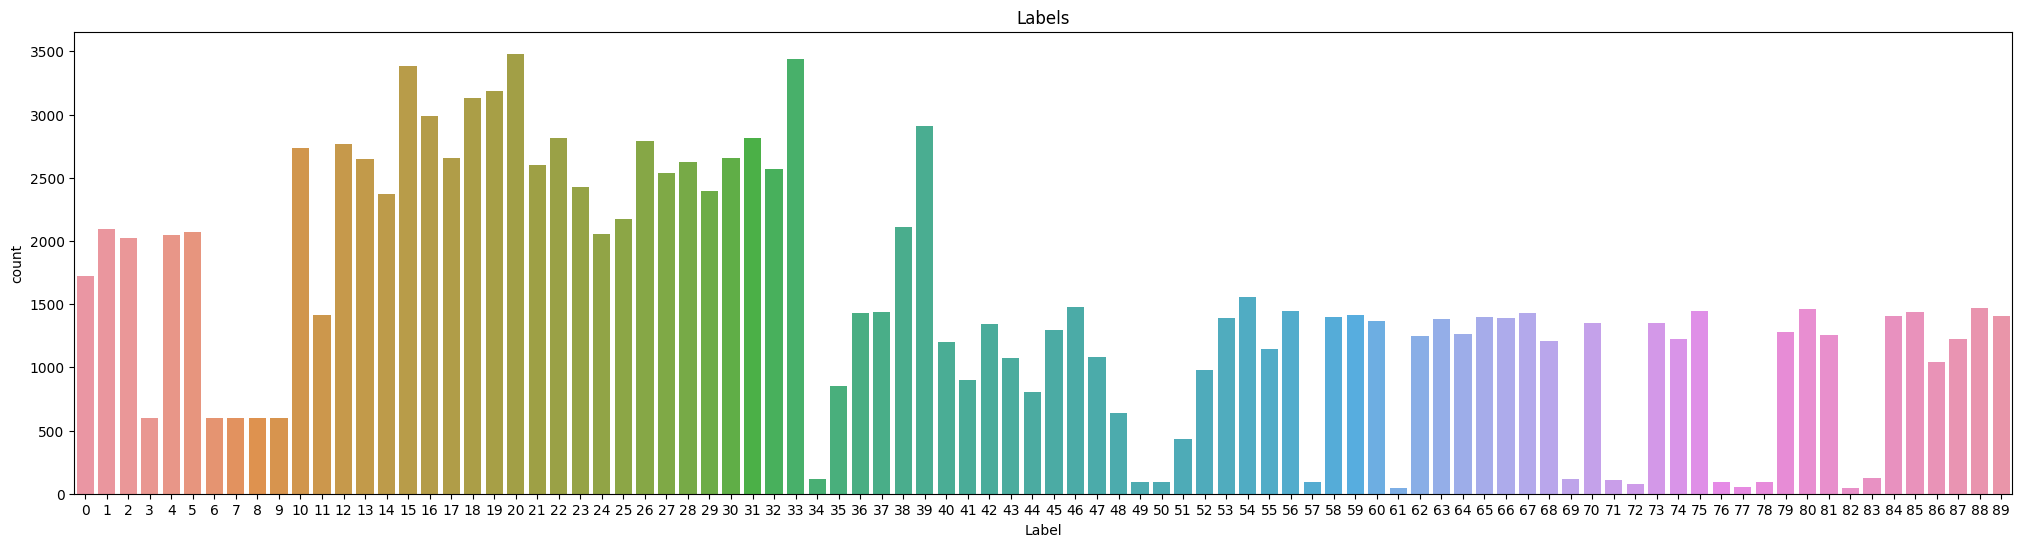

In [10]:
plt.figure(figsize=(25, 6))
sns.countplot(df, x="Label")
plt.title("Labels")
plt.savefig('Media/01 - Labels without smote.png', dpi=1500,
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

In [11]:
X = df.drop('Label', axis=1).to_numpy()
y = df['Label'].to_numpy()

smote = SMOTE()
X_sm,y_sm = smote.fit_resample(X,y)

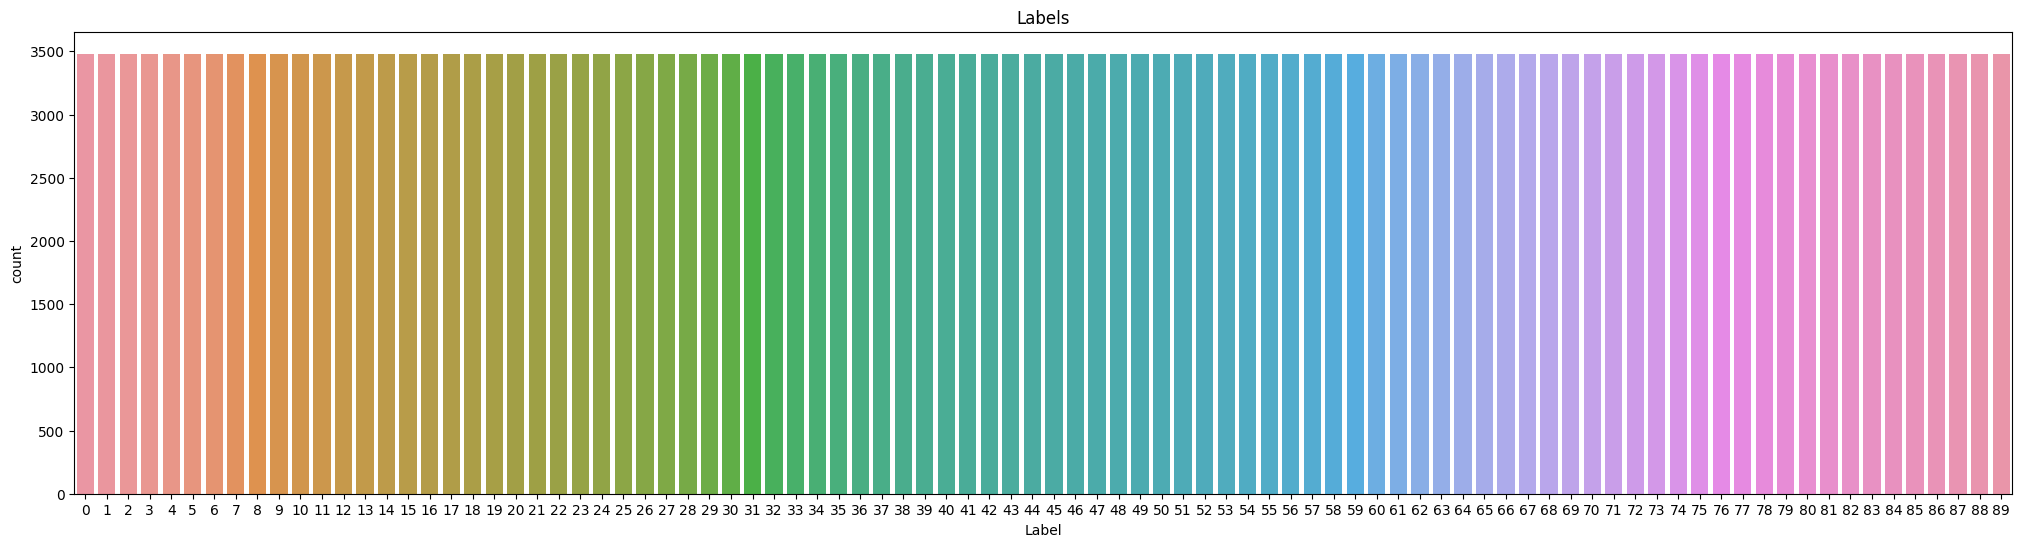

In [12]:
plt.figure(figsize=(25, 6))
sns.countplot(pd.DataFrame(y_sm, columns=['Label']), x="Label")
plt.title("Labels")
plt.savefig('Media/02 - Labels with smote.png', dpi=1500,
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

In [13]:
#Scale the features using StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_sm)

# filename = 'Pipeline/stan_scale.sav'
# pickle.dump(scaler, open(filename, 'wb'))


# load the scaler
scaler = pickle.load(open('Pipeline/stan_scale.sav', 'rb'))

X_sm = scaler.transform(X_sm)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=30,shuffle=y_sm)

## XGBClassifier

In [15]:
# xg = xgb.XGBClassifier()
# xg.fit(X_train, y_train)

# filename = 'Model/xgb.sav'
# pickle.dump(xg, open(filename, 'wb'))

In [16]:
xg = pickle.load(open('Model/xgb.sav', 'rb'))

In [17]:
xg_train_pred = xg.predict(X_train)
xg_test_pred = xg.predict(X_test)

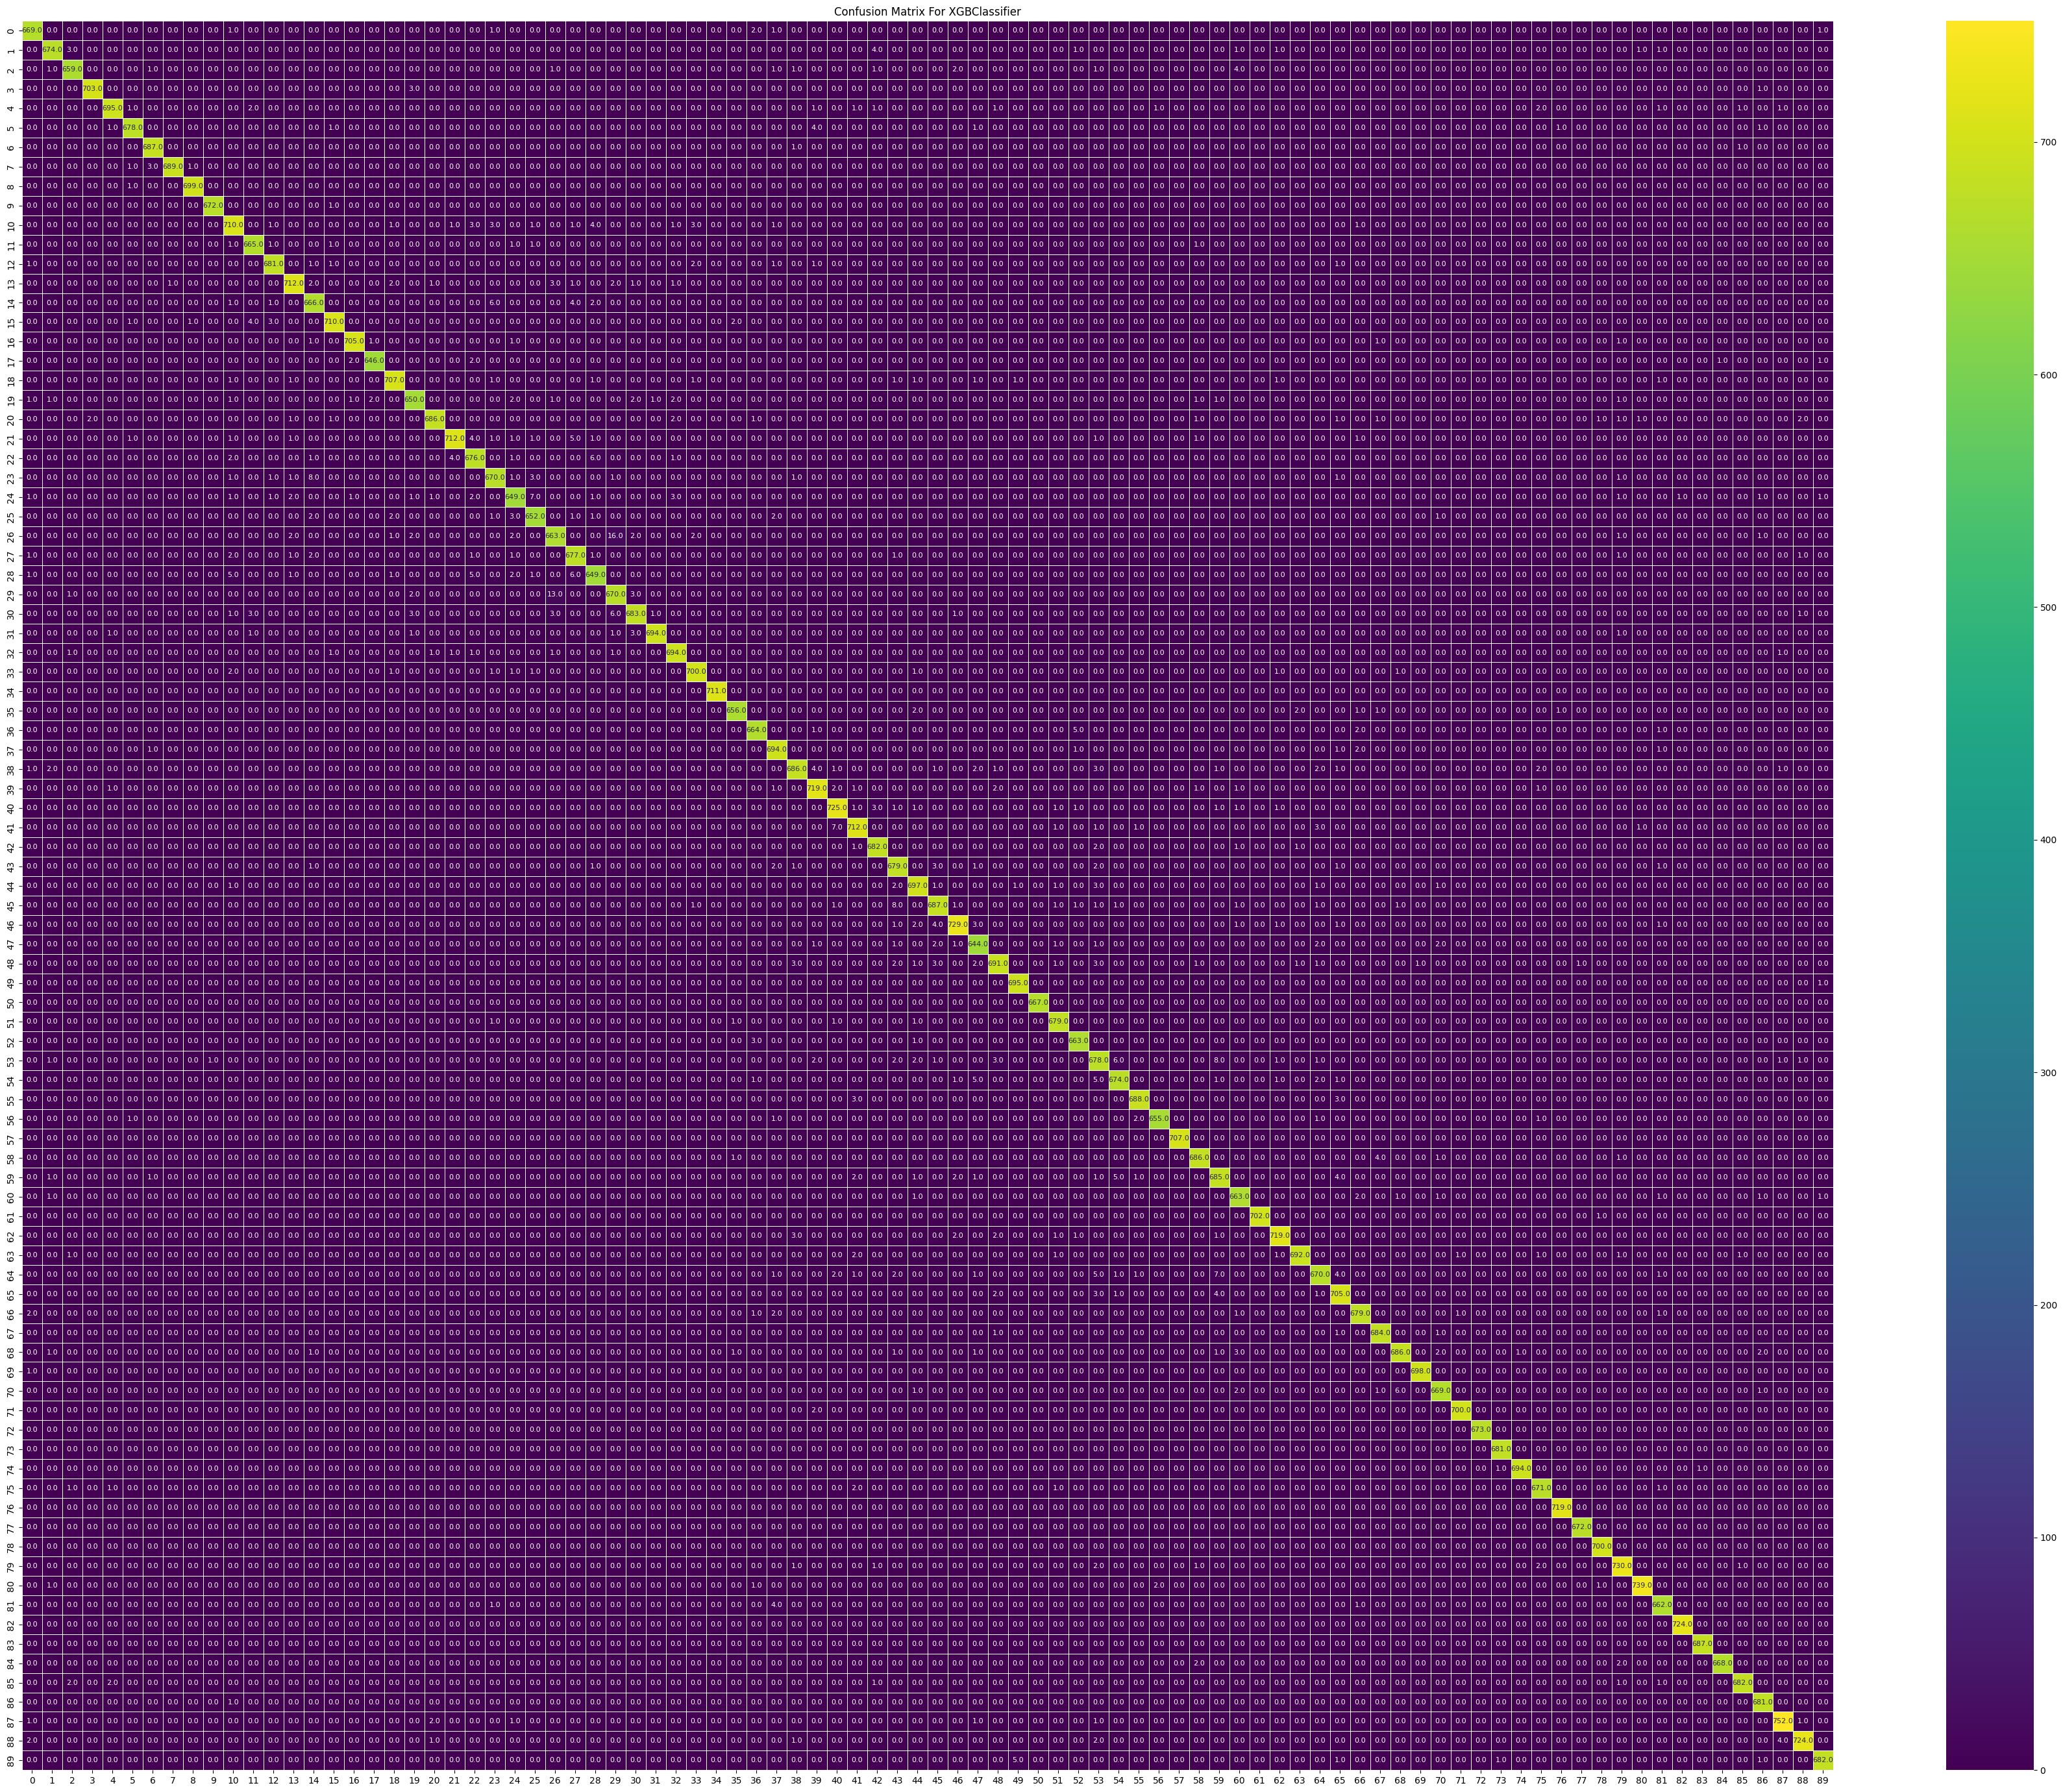

In [18]:
plt.figure(figsize=(45, 35))
sns.heatmap(confusion_matrix(y_test, xg_test_pred),annot=True,fmt=".1f",
            annot_kws={"size": 8},  # Adjust font size of the annotations
            cmap="viridis",  # Use a color map with good contrast
            linewidths=.5
            )
plt.title("Confusion Matrix For XGBClassifier")
plt.savefig('Media/03 - Confusion Matrix For XGBClassifier.png',
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

In [19]:
xg_train_accu = accuracy_score(y_train, xg_train_pred)
xg_test_accu = accuracy_score(y_test, xg_test_pred)

print("Train Score ",xg_train_accu)
print("Test Score ",xg_test_accu)

Train Score  0.9976100418142935
Test Score  0.9865140923744773


In [20]:
xg_precision = precision_score(y_test, xg_test_pred, average='weighted')
xg_recall = recall_score(y_test, xg_test_pred, average='weighted')
xg_f1 = f1_score(y_test, xg_test_pred, average='weighted')

In [21]:
np.set_printoptions(threshold=sys.maxsize)
print(classification_report(y_test, xg_test_pred))
xg = 0

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       675
           1       0.99      0.98      0.98       686
           2       0.99      0.98      0.98       672
           3       1.00      0.99      1.00       707
           4       0.99      0.98      0.99       708
           5       0.99      0.99      0.99       687
           6       0.99      1.00      0.99       689
           7       1.00      0.99      1.00       694
           8       1.00      1.00      1.00       700
           9       1.00      1.00      1.00       673
          10       0.97      0.97      0.97       731
          11       0.99      0.99      0.99       671
          12       0.99      0.99      0.99       689
          13       0.99      0.98      0.98       726
          14       0.97      0.98      0.98       680
          15       0.99      0.98      0.99       721
          16       0.99      0.99      0.99       710
          17       1.00    

## RandomForestClassifier

In [22]:
# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)


# filename = 'Model/random_forest.sav'
# pickle.dump(rfc, open(filename, 'wb'))

In [23]:
rfc = pickle.load(open('Model/random_forest.sav', 'rb'))

In [24]:
rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

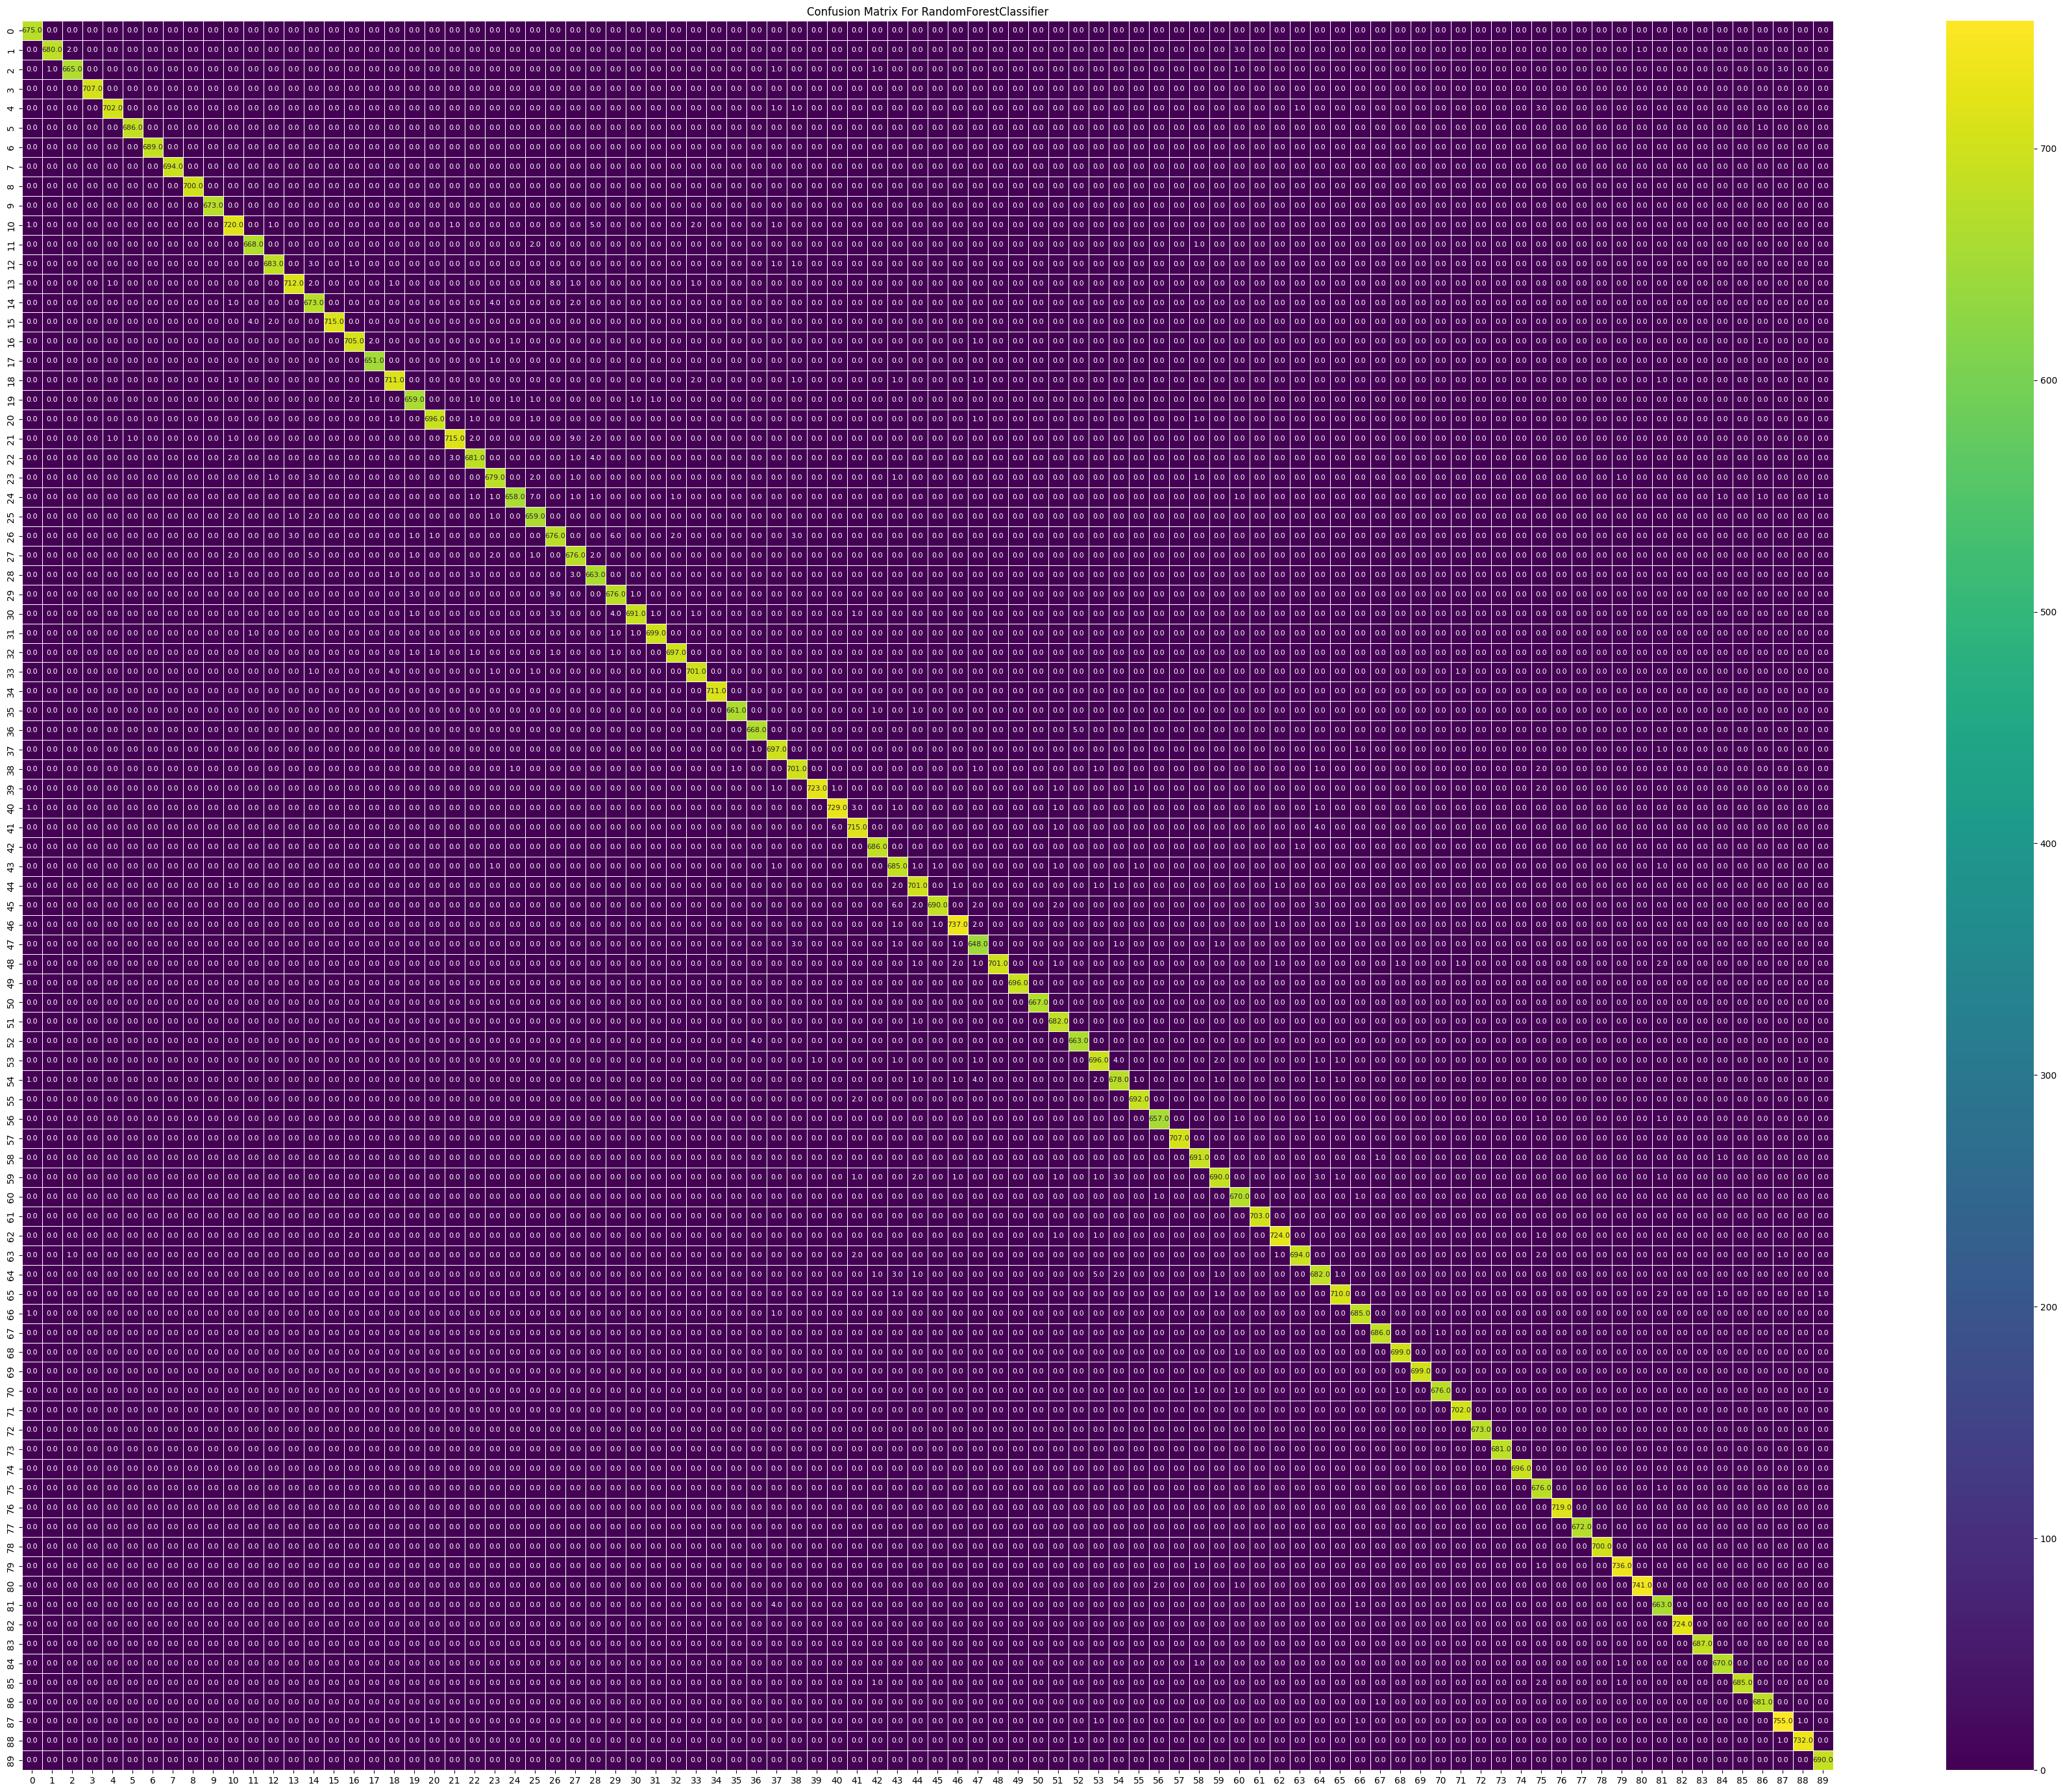

In [25]:
plt.figure(figsize=(45, 35))
sns.heatmap(confusion_matrix(y_test, rfc_test_pred),annot=True,fmt=".1f",
            annot_kws={"size": 8},  # Adjust font size of the annotations
            cmap="viridis",  # Use a color map with good contrast
            linewidths=.5
            )
plt.title("Confusion Matrix For RandomForestClassifier")
plt.savefig('Media/04 - Confusion Matrix For RandomForestClassifier.png',
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

In [26]:
rfc_train_accu = accuracy_score(y_train, rfc_train_pred)
rfc_test_accu = accuracy_score(y_test, rfc_test_pred)

print("Train Score ",rfc_train_accu)
print("Test Score ",rfc_test_accu)

Train Score  0.9989027737878643
Test Score  0.9929777522423314


In [27]:
rfc_precision = precision_score(y_test, rfc_test_pred, average='weighted')
rfc_recall = recall_score(y_test, rfc_test_pred, average='weighted')
rfc_f1 = f1_score(y_test, rfc_test_pred, average='weighted')

In [28]:
np.set_printoptions(threshold=sys.maxsize)

print(classification_report(y_test, rfc_test_pred))
rfc = 0

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       675
           1       1.00      0.99      0.99       686
           2       1.00      0.99      0.99       672
           3       1.00      1.00      1.00       707
           4       1.00      0.99      0.99       708
           5       1.00      1.00      1.00       687
           6       1.00      1.00      1.00       689
           7       1.00      1.00      1.00       694
           8       1.00      1.00      1.00       700
           9       1.00      1.00      1.00       673
          10       0.98      0.98      0.98       731
          11       0.99      1.00      0.99       671
          12       0.99      0.99      0.99       689
          13       0.99      0.98      0.99       726
          14       0.98      0.99      0.98       680
          15       1.00      0.99      1.00       721
          16       0.99      0.99      0.99       710
          17       1.00    

## KNN

In [29]:
# knn = KNeighborsClassifier(n_neighbors=40)
# knn.fit(X_train, y_train)


# filename = 'Model/knn.sav'
# pickle.dump(knn, open(filename, 'wb'))

In [30]:
knn = pickle.load(open('Model/knn.sav', 'rb'))

In [31]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

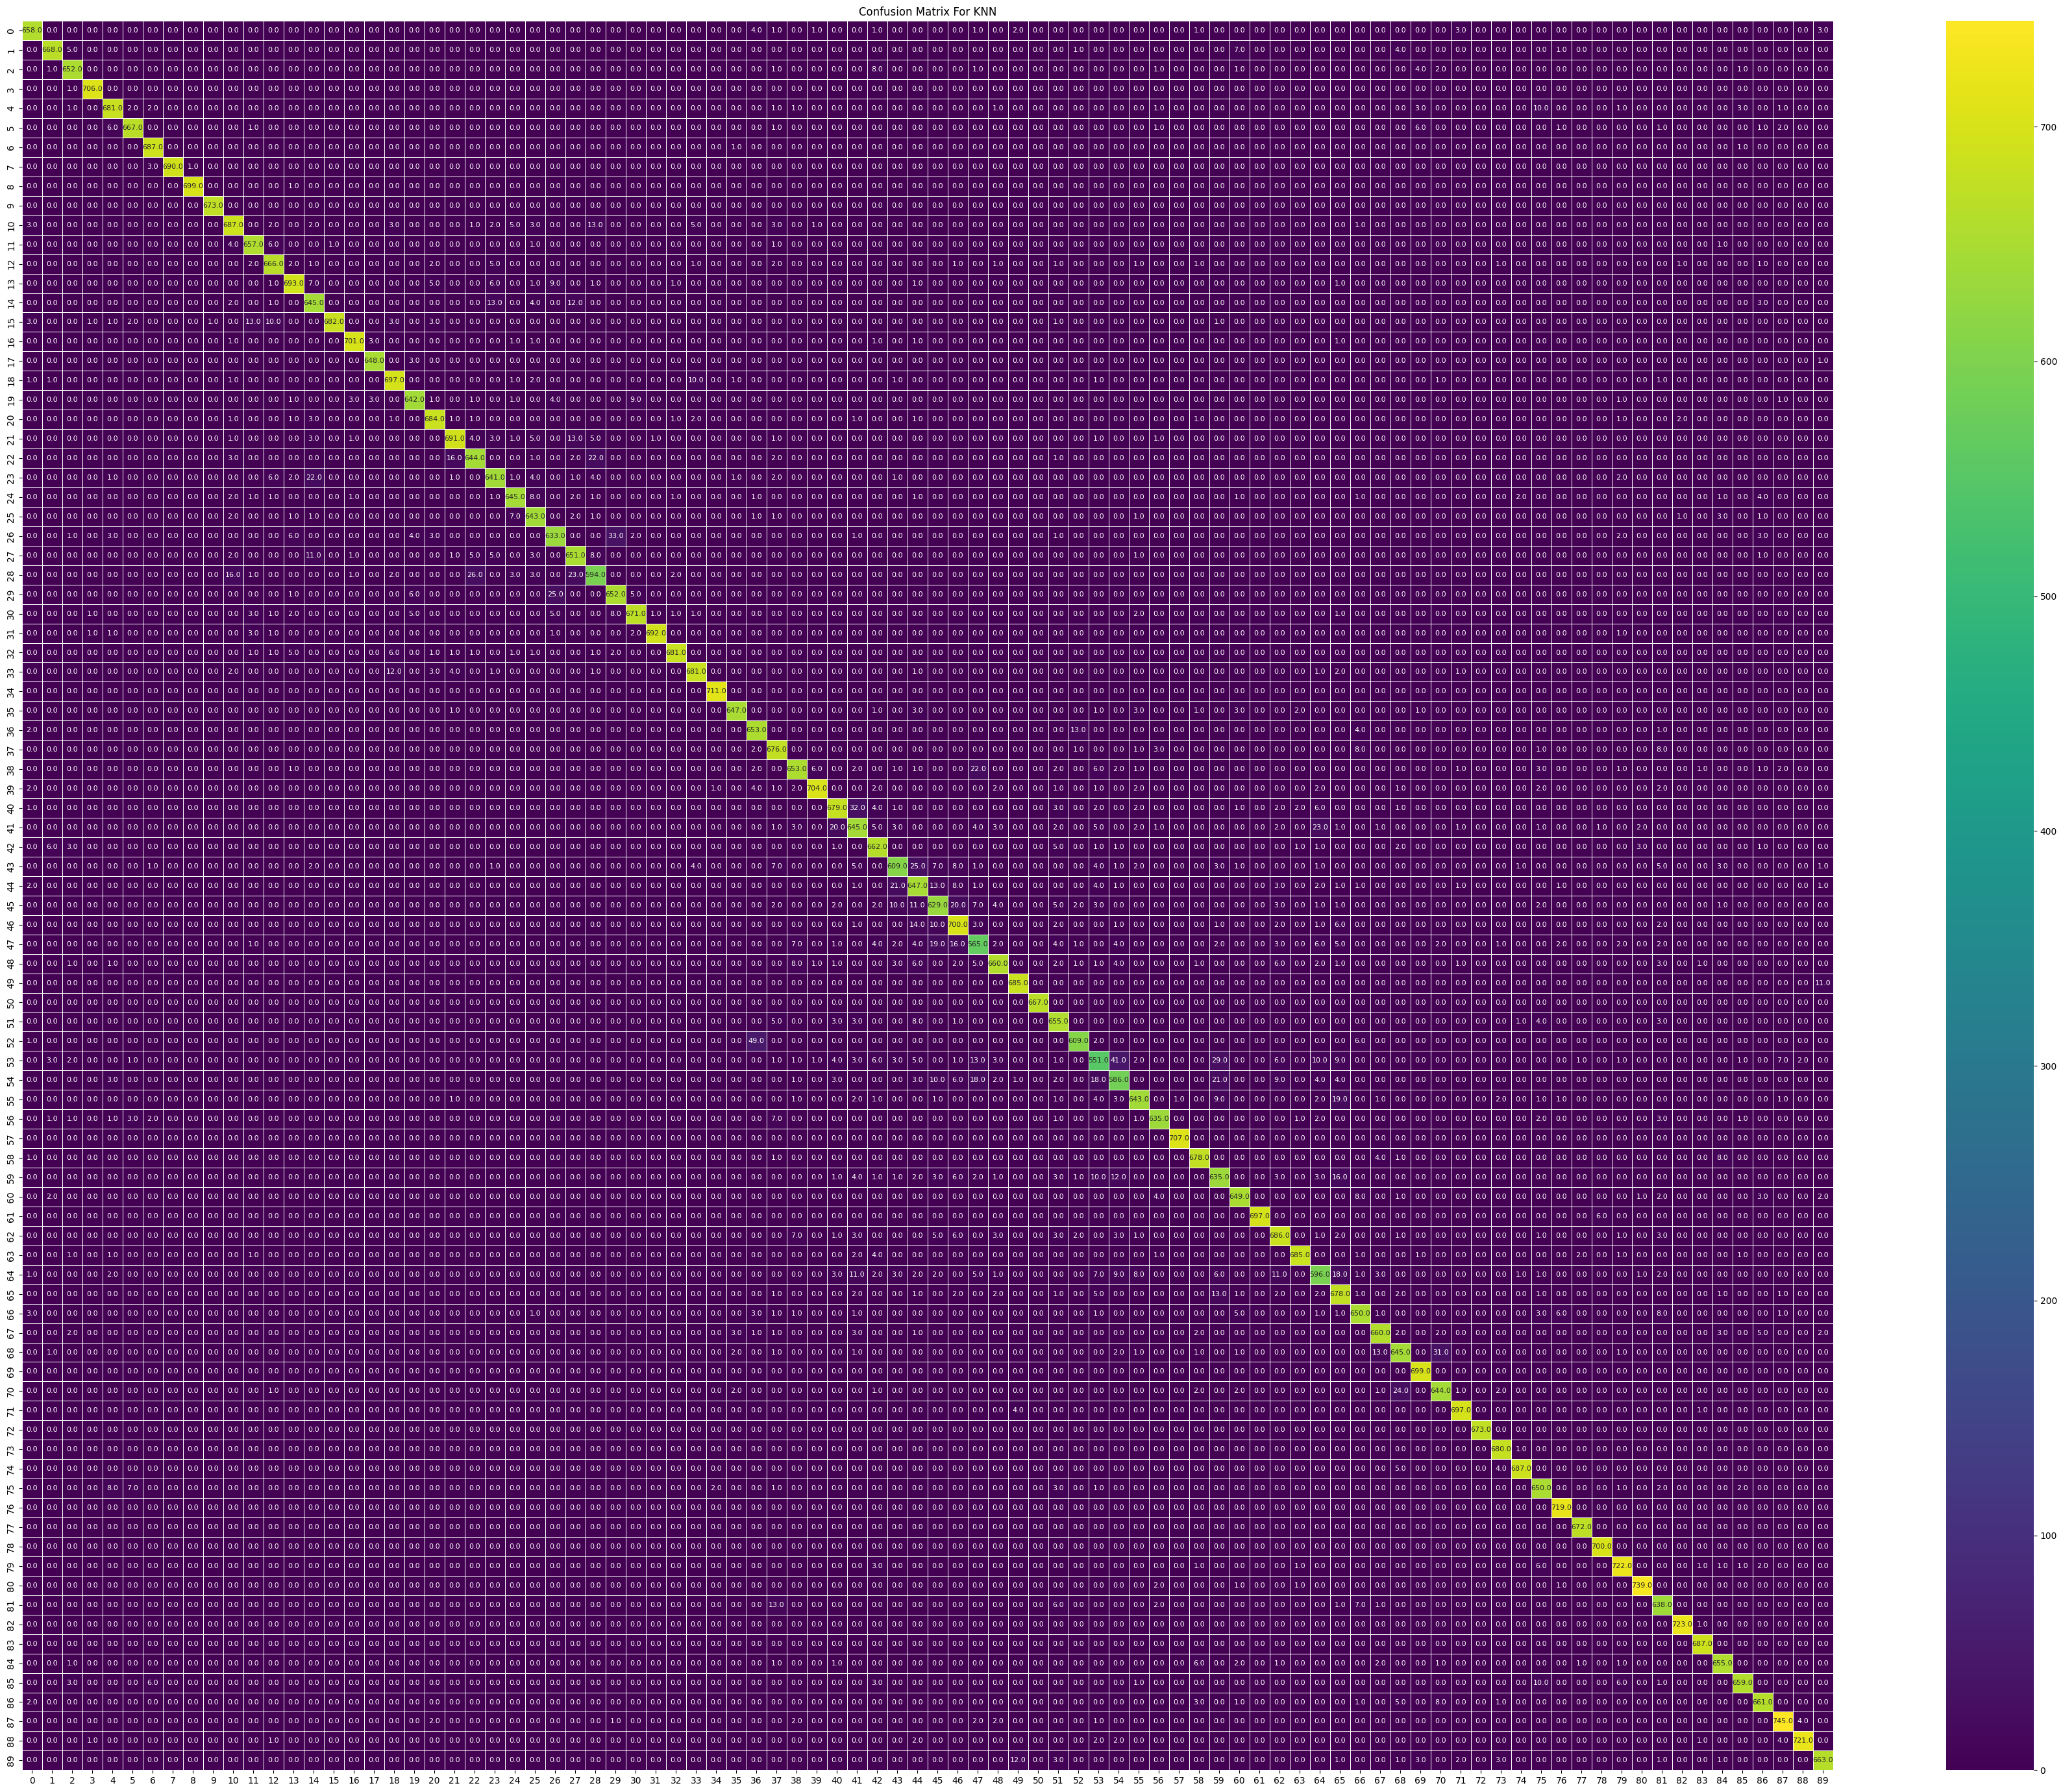

In [32]:
plt.figure(figsize=(45, 35))
sns.heatmap(confusion_matrix(y_test, knn_test_pred),annot=True,fmt=".1f",
            annot_kws={"size": 8},  # Adjust font size of the annotations
            cmap="viridis",  # Use a color map with good contrast
            linewidths=.5
            )
plt.title("Confusion Matrix For KNN")
plt.savefig('Media/05 - Confusion Matrix For KNN.png',
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

In [33]:
knn_train_accu = accuracy_score(y_train, knn_train_pred)
knn_test_accu = accuracy_score(y_test, knn_test_pred)

print("Train Score ",knn_train_accu)
print("Test Score ",knn_test_accu)

Train Score  0.9598375307223339
Test Score  0.9571483290242268


In [34]:
knn_precision = precision_score(y_test, knn_test_pred, average='weighted')
knn_recall = recall_score(y_test, knn_test_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_test_pred, average='weighted')

In [35]:
np.set_printoptions(threshold=sys.maxsize)

print(classification_report(y_test, knn_test_pred))
knn = 0

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       675
           1       0.98      0.97      0.98       686
           2       0.97      0.97      0.97       672
           3       0.99      1.00      1.00       707
           4       0.96      0.96      0.96       708
           5       0.98      0.97      0.97       687
           6       0.98      1.00      0.99       689
           7       1.00      0.99      1.00       694
           8       1.00      1.00      1.00       700
           9       1.00      1.00      1.00       673
          10       0.95      0.94      0.94       731
          11       0.96      0.98      0.97       671
          12       0.95      0.97      0.96       689
          13       0.97      0.95      0.96       726
          14       0.93      0.95      0.94       680
          15       1.00      0.95      0.97       721
          16       0.99      0.99      0.99       710
          17       0.99    

## Ensemble Learning

In [36]:
# dc = DecisionTreeClassifier()
# ens = BaggingClassifier(dc, n_estimators=10)
# ens.fit(X_train, y_train)


# filename = 'Model/ensemble.sav'
# pickle.dump(ens, open(filename, 'wb'))

In [37]:
ens = pickle.load(open('Model/ensemble.sav', 'rb'))

In [38]:
ens_train_pred = ens.predict(X_train)
ens_test_pred = ens.predict(X_test)

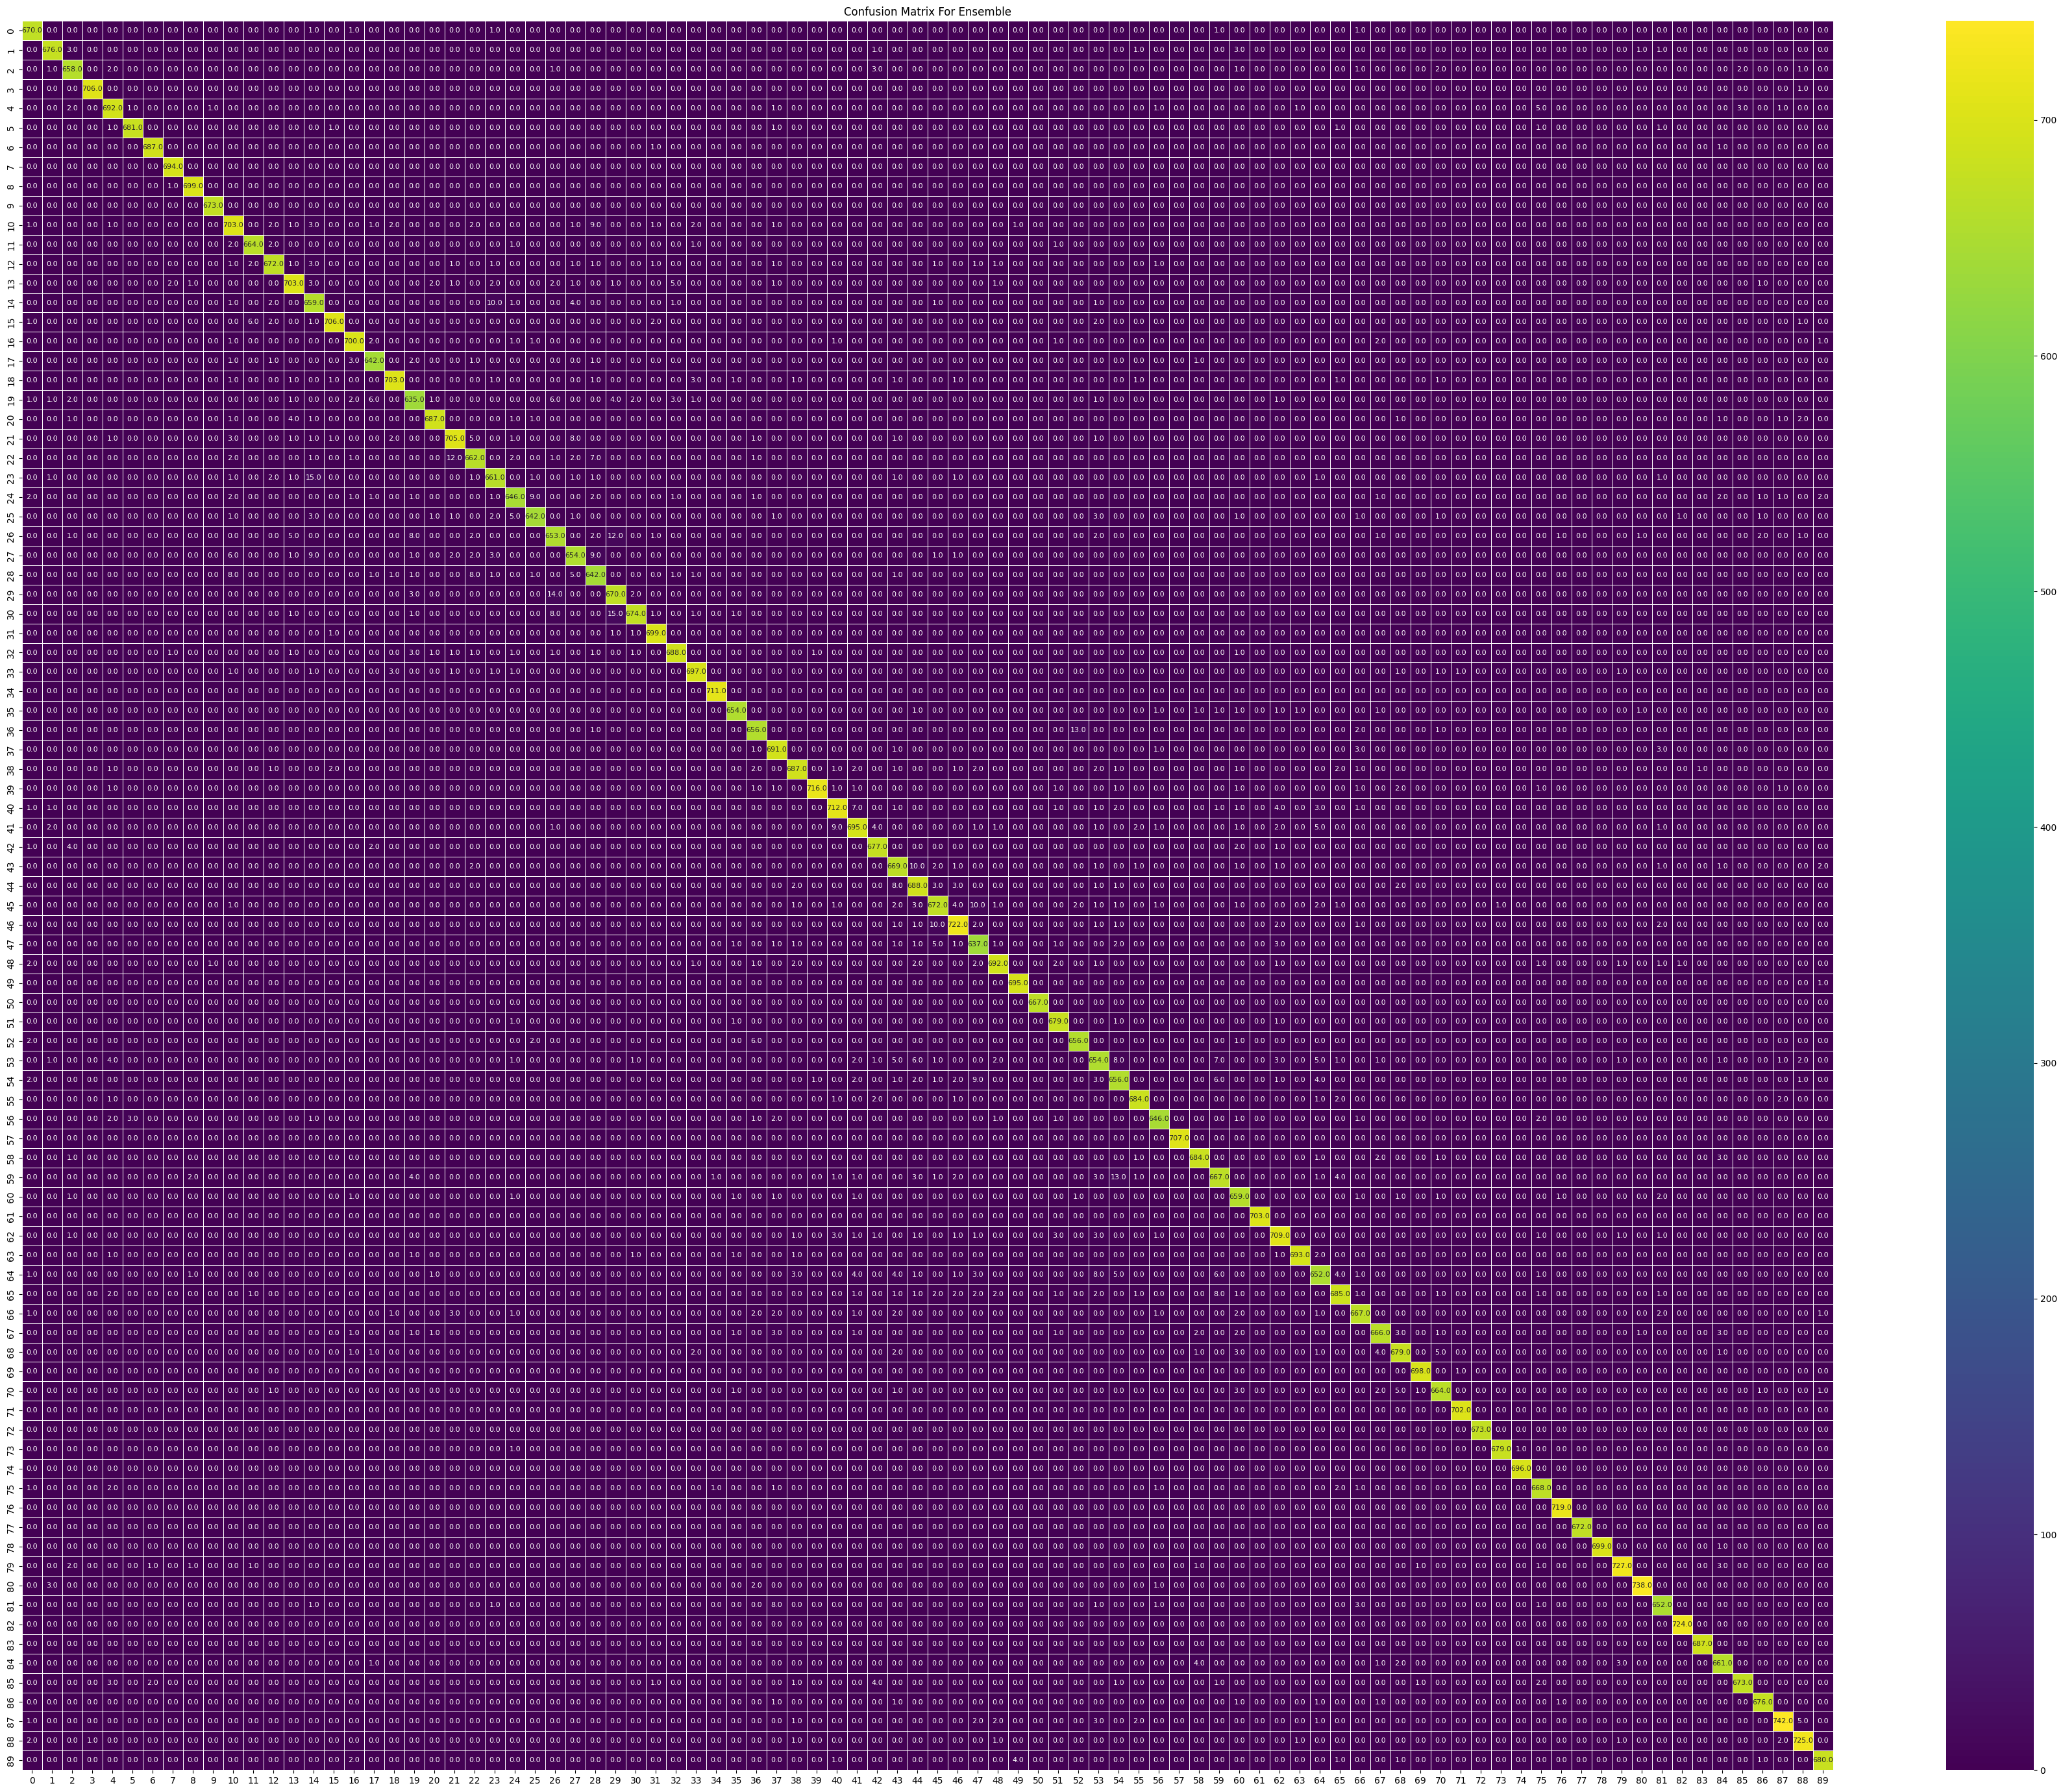

In [39]:
plt.figure(figsize=(45, 35))
sns.heatmap(confusion_matrix(y_test, ens_test_pred),annot=True,fmt=".1f",
            annot_kws={"size": 8},  # Adjust font size of the annotations
            cmap="viridis",  # Use a color map with good contrast
            linewidths=.5
            )
plt.title("Confusion Matrix For Ensemble")
plt.savefig('Media/06 - Confusion Matrix For Ensemble.png',
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

In [40]:
ens_train_accu = accuracy_score(y_train, ens_train_pred)
ens_test_accu = accuracy_score(y_test, ens_test_pred)


print("Train Score ",ens_train_accu)
print("Test Score ",ens_test_accu)

Train Score  0.9942385649079128
Test Score  0.9790449743049571


In [41]:
ens_precision = precision_score(y_test, ens_test_pred, average='weighted')
ens_recall = recall_score(y_test, ens_test_pred, average='weighted')
ens_f1 = f1_score(y_test, ens_test_pred, average='weighted')

In [42]:
np.set_printoptions(threshold=sys.maxsize)

print(classification_report(y_test, ens_test_pred))
ens = 0

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       675
           1       0.99      0.99      0.99       686
           2       0.97      0.98      0.98       672
           3       1.00      1.00      1.00       707
           4       0.97      0.98      0.97       708
           5       0.99      0.99      0.99       687
           6       1.00      1.00      1.00       689
           7       0.99      1.00      1.00       694
           8       0.99      1.00      1.00       700
           9       1.00      1.00      1.00       673
          10       0.96      0.96      0.96       731
          11       0.99      0.99      0.99       671
          12       0.98      0.98      0.98       689
          13       0.98      0.97      0.97       726
          14       0.94      0.97      0.95       680
          15       0.99      0.98      0.99       721
          16       0.98      0.99      0.98       710
          17       0.98    

## Deep learning

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

## ANN

In [44]:
ann_model = Sequential()


# Add fully connected (dense) layers
ann_model.add(Input(shape=(63,)))
ann_model.add(Dense(250, activation='relu'))

ann_model.add(Dense(150, activation='relu'))
ann_model.add(Dense(120, activation='relu'))
ann_model.add(Dense(100, activation='relu'))
ann_model.add(Dense(95, activation='relu'))

ann_model.add(Dense(90, activation='softmax'))

# Compile the ann_model
ann_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 250)            │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        37,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        18,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 95)             │         9,595 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 90)             │         8,640 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,105 (398.85 KB)

 Trainable params: 102,105 (398.85 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
#history = ann_model.fit(X_train, to_categorical(y_train), epochs=25, batch_size=128, validation_data=(X_test, to_categorical(y_test)))

#ann_model.save('Model/ann.keras')

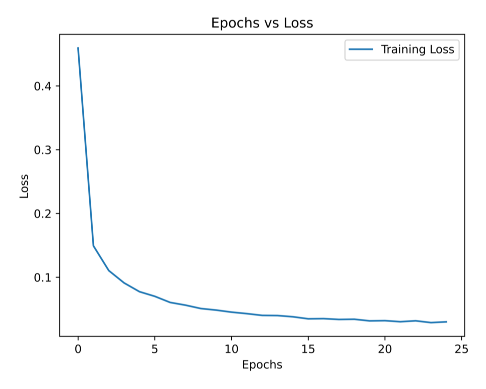

In [47]:
# epochs = history.epoch
# loss = history.history['loss']

# plt.plot(epochs, loss, label='Training Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Epochs vs Loss')
# plt.legend()
# plt.savefig('Media/15 ANN Training Loss',dpi=1500,
#             bbox_inches ="tight",
#             transparent = False
#             )
# plt.show()

pil_im = Image.open('Media/15 ANN Training Loss.png', 'r')
plt.imshow(np.asarray(pil_im))
plt.axis('off')
plt.show()

In [48]:
ann_model = load_model('Model/ann.keras')

In [49]:
ann_train_pre = np.argmax(ann_model.predict(X_train), axis=1)
ann_test_pre = np.argmax(ann_model.predict(X_test), axis=1)

7833/7833 ━━━━━━━━━━━━━━━━━━━━ 2s 303us/step
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step


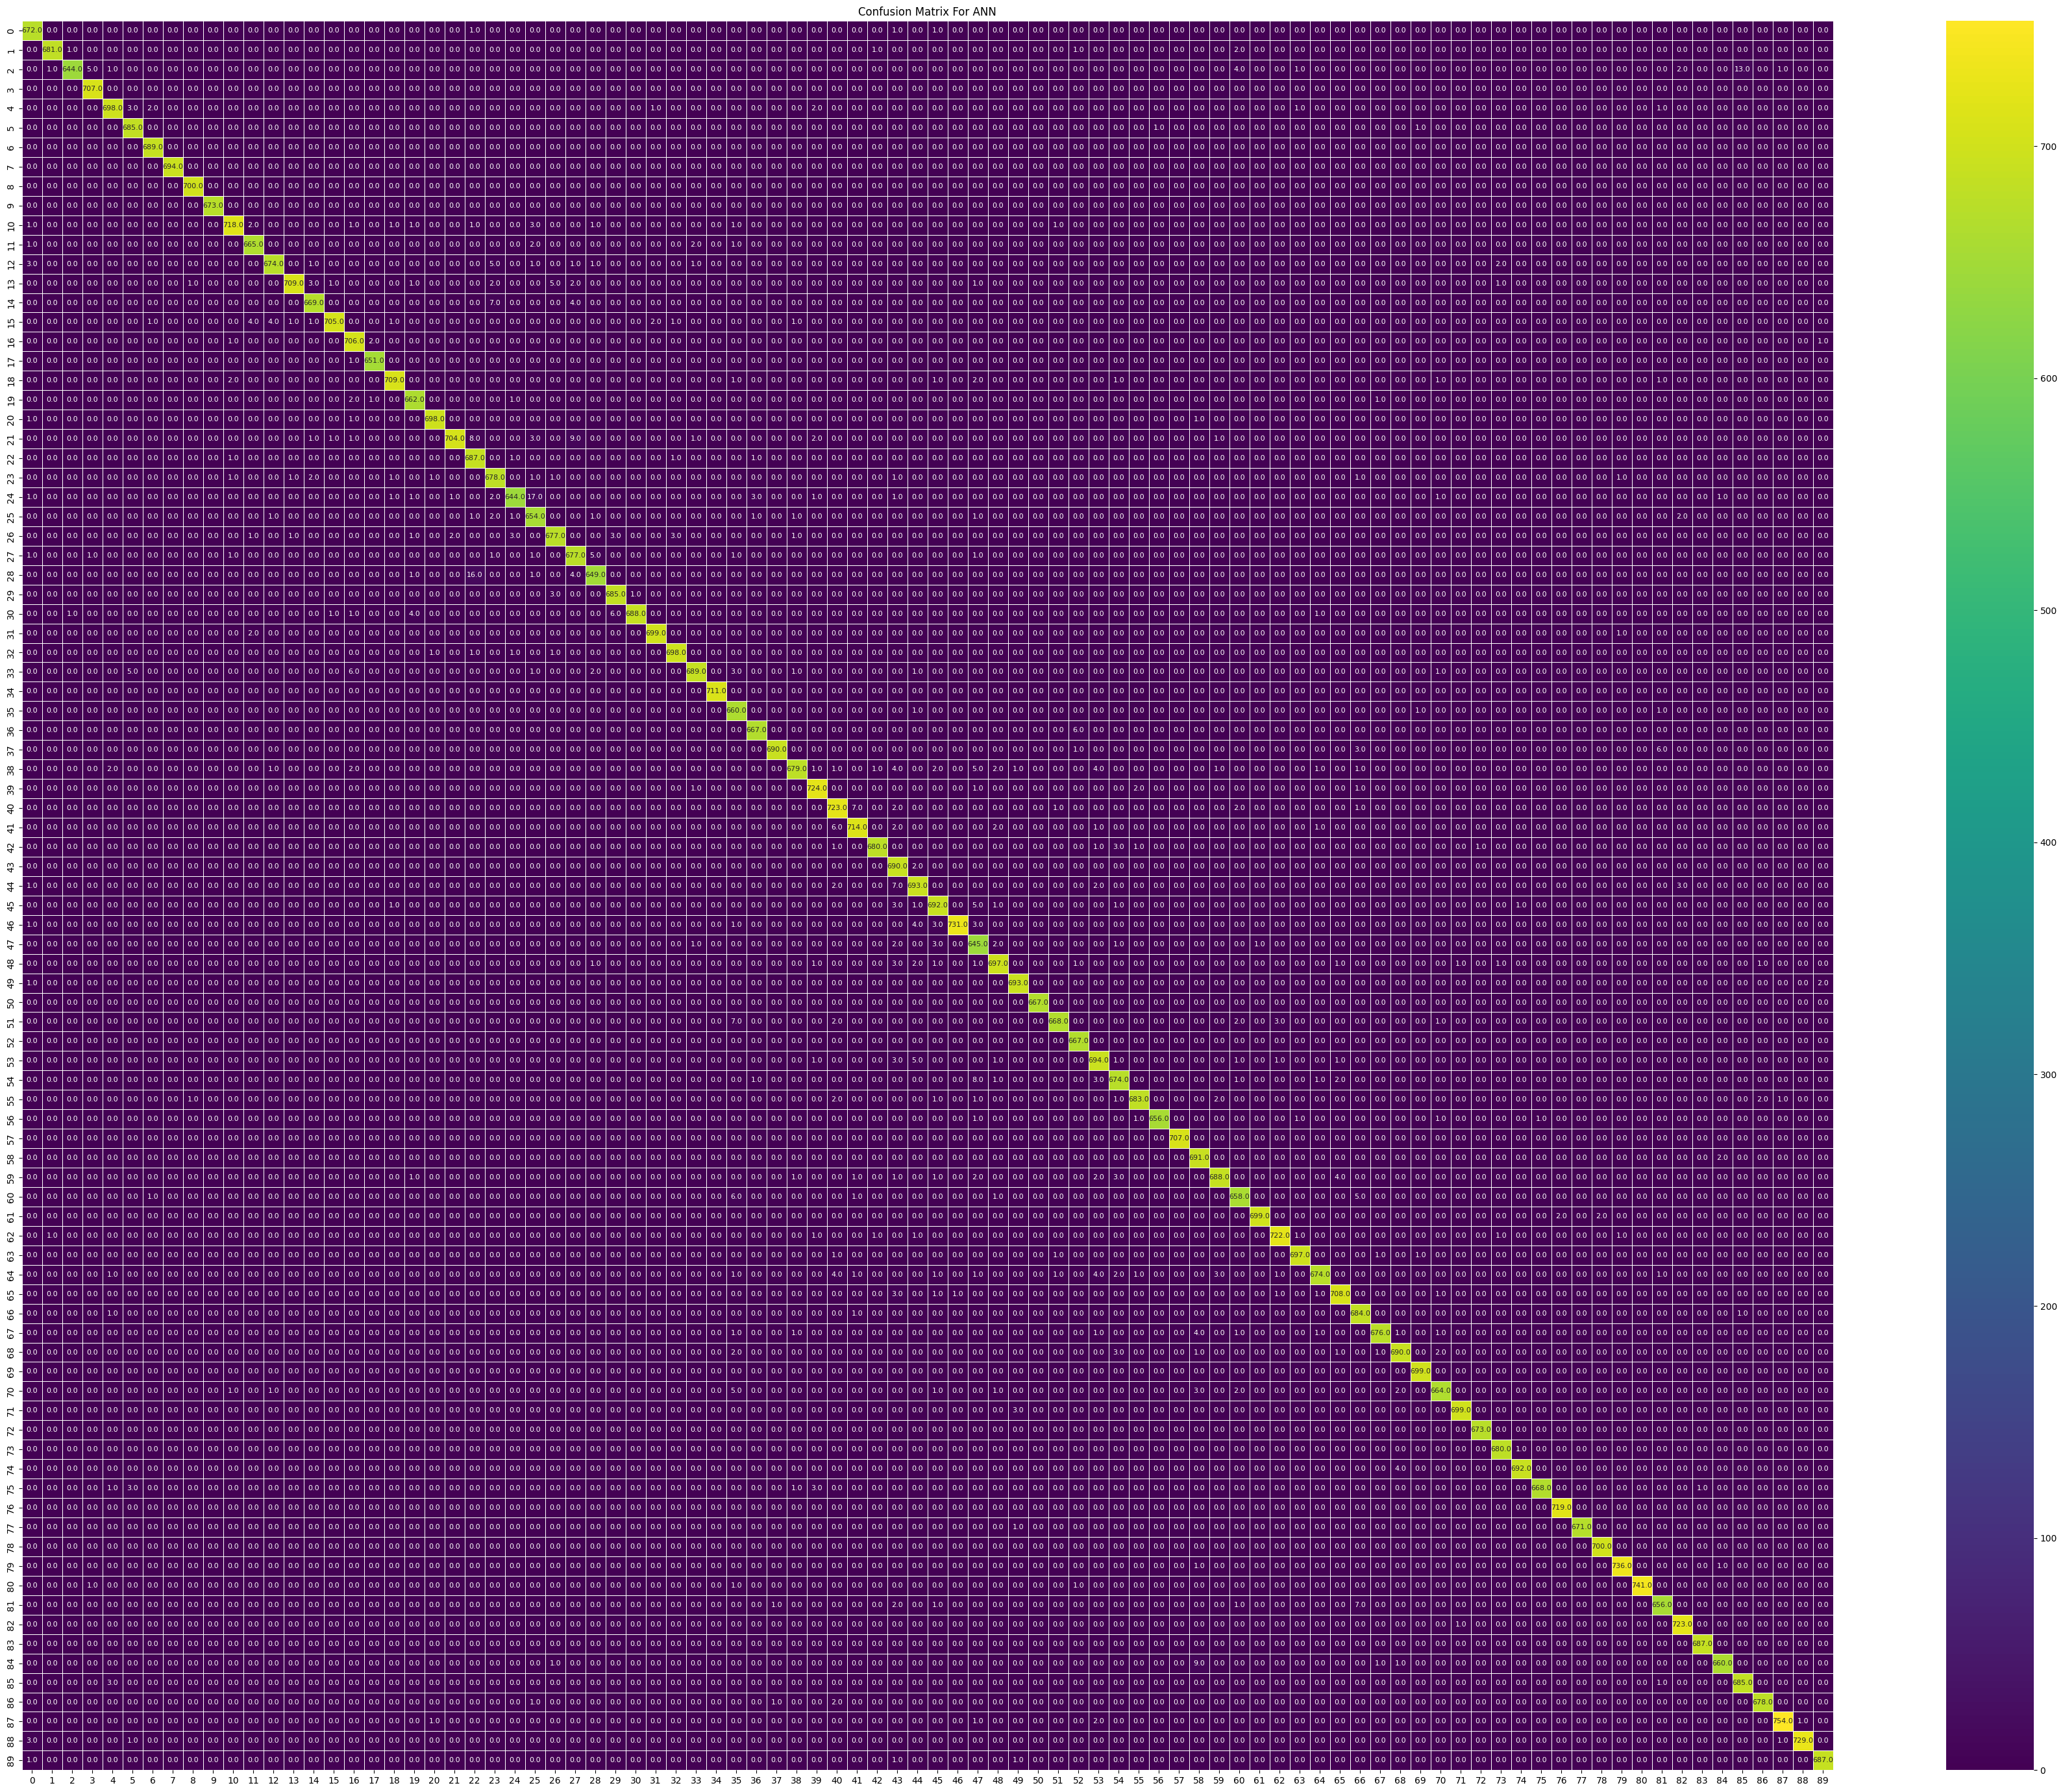

In [50]:
plt.figure(figsize=(45, 35))
sns.heatmap(confusion_matrix(y_test, ann_test_pre),annot=True,fmt=".1f",
            annot_kws={"size": 8},  # Adjust font size of the annotations
            cmap="viridis",  # Use a color map with good contrast
            linewidths=.5
            )
plt.title("Confusion Matrix For ANN")
plt.savefig('Media/07 - Confusion Matrix For ANN.png',
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

In [51]:
ann_train_accu = accuracy_score(y_train, ann_train_pre)
ann_test_accu = accuracy_score(y_test, ann_test_pre)

print("Train Score ",ann_train_accu)
print("Test Score ",ann_test_accu)

Train Score  0.9928700245778671
Test Score  0.9883973315458521


In [52]:
ann_precision = precision_score(y_test, ann_test_pre, average='weighted')
ann_recall = recall_score(y_test, ann_test_pre, average='weighted')
ann_f1 = f1_score(y_test, ann_test_pre, average='weighted')

In [53]:
np.set_printoptions(threshold=sys.maxsize)

print(classification_report(y_test, ann_test_pre))

ann = 0

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       675
           1       1.00      0.99      0.99       686
           2       1.00      0.96      0.98       672
           3       0.99      1.00      1.00       707
           4       0.99      0.99      0.99       708
           5       0.98      1.00      0.99       687
           6       0.99      1.00      1.00       689
           7       1.00      1.00      1.00       694
           8       1.00      1.00      1.00       700
           9       1.00      1.00      1.00       673
          10       0.99      0.98      0.99       731
          11       0.99      0.99      0.99       671
          12       0.99      0.98      0.98       689
          13       1.00      0.98      0.99       726
          14       0.99      0.98      0.99       680
          15       1.00      0.98      0.99       721
          16       0.98      0.99      0.99       710
          17       1.00    

## CNN

In [54]:
cnn_model = Sequential()

# Add convolutional layers
cnn_model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(63, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv1D(64, kernel_size=2, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
cnn_model.add(Flatten())

# Add fully connected (dense) layers
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))

# Output layer with 90 classes
cnn_model.add(Dense(90, activation='softmax'))

# Compile the cnn_model
cnn_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 62, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 30, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 90)             │        11,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,874 (542.48 KB)

 Trainable params: 138,874 (542.48 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# history = cnn_model.fit(X_train, to_categorical(y_train), epochs=25, batch_size=128, validation_data=(X_test, to_categorical(y_test)))

# cnn_model.save('Model/cnn.keras')

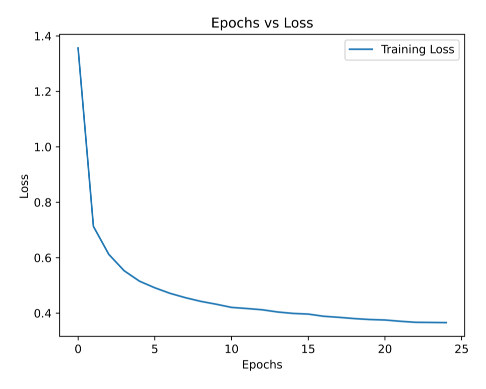

In [57]:
# epochs = history.epoch
# loss = history.history['loss']

# plt.plot(epochs, loss, label='Training Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Epochs vs Loss')
# plt.legend()
# plt.savefig('Media/16 CNN Training Loss',dpi=1500,
#             bbox_inches ="tight",
#             transparent = False
#             )
# plt.show()

pil_im = Image.open('Media/16 CNN Training Loss.png', 'r')
plt.imshow(np.asarray(pil_im))
plt.axis('off')
plt.show()

In [58]:
cnn_model = load_model('Model/cnn.keras')

In [59]:
cnn_train_pre = np.argmax(cnn_model.predict(X_train), axis=1)
cnn_test_pre = np.argmax(cnn_model.predict(X_test), axis=1)

7833/7833 ━━━━━━━━━━━━━━━━━━━━ 4s 455us/step
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step


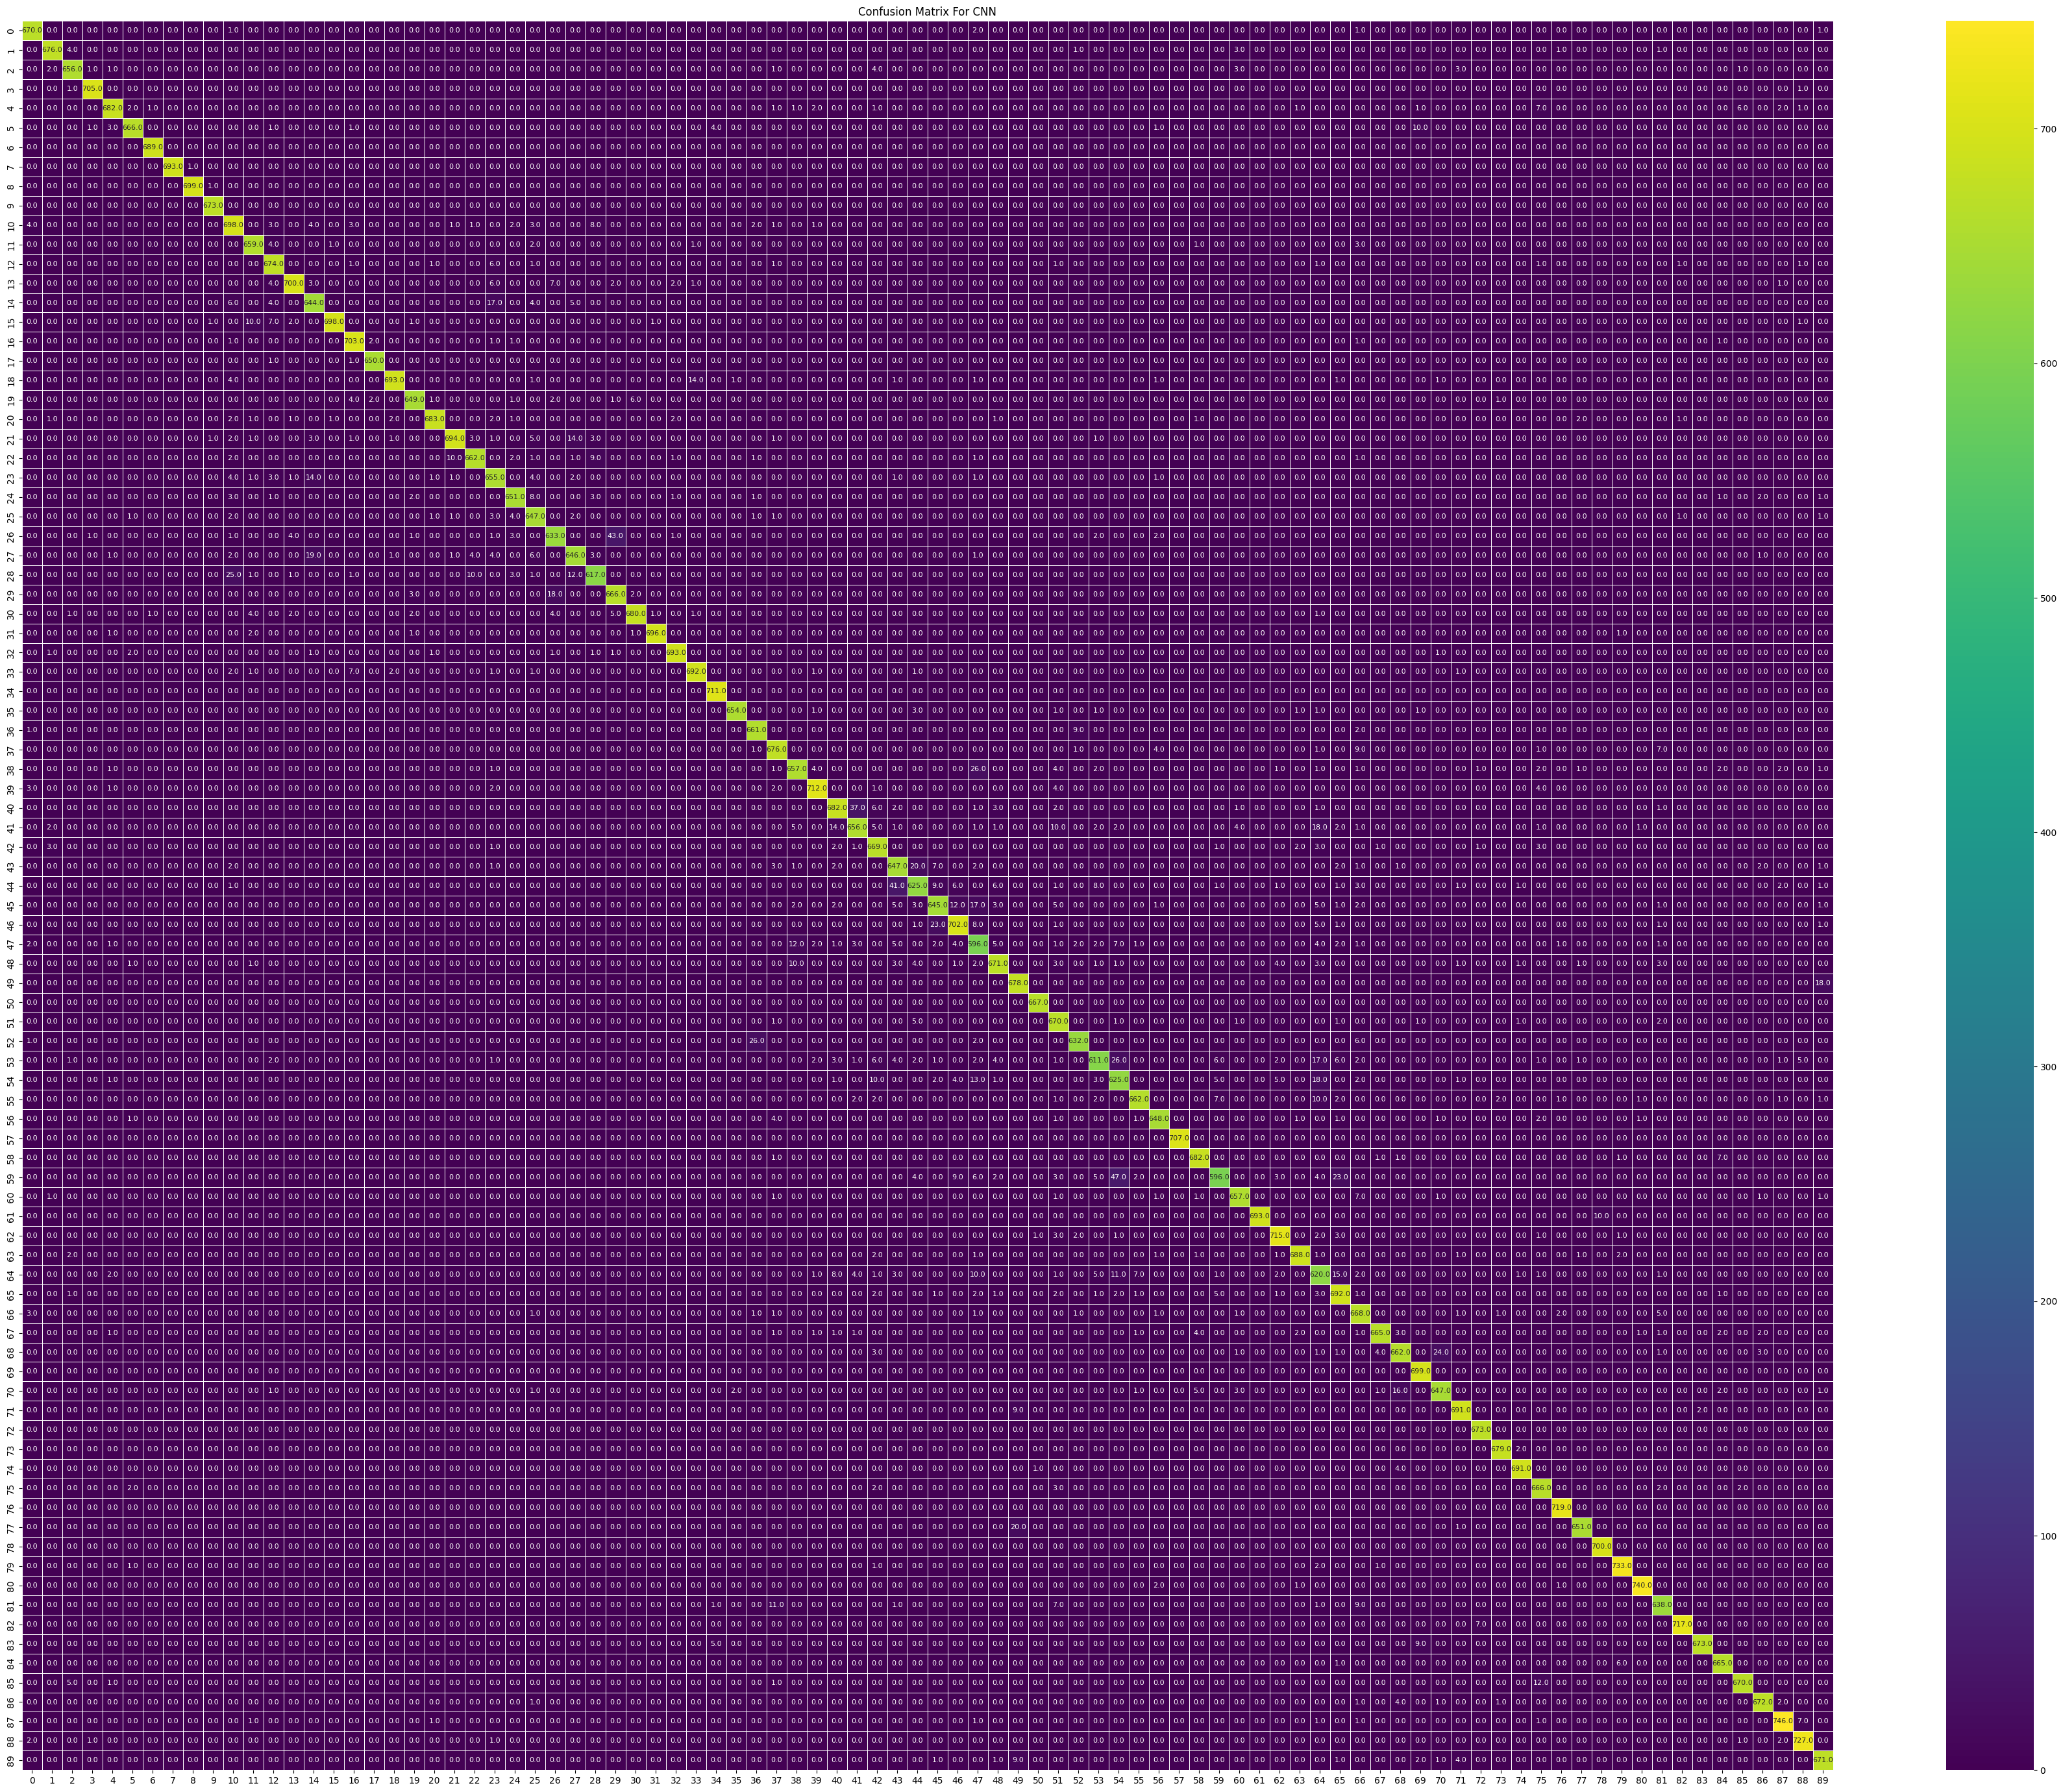

In [60]:
plt.figure(figsize=(45, 35))
sns.heatmap(confusion_matrix(y_test, cnn_test_pre),annot=True,fmt=".1f",
            annot_kws={"size": 8},  # Adjust font size of the annotations
            cmap="viridis",  # Use a color map with good contrast
            linewidths=.5
            )
plt.title("Confusion Matrix For CNN")
plt.savefig('Media/08 - Confusion Matrix For CNN.png',
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

In [61]:
cnn_train_accu = accuracy_score(y_train, cnn_train_pre)
cnn_test_accu = accuracy_score(y_test, cnn_test_pre)

print("Train Score ",cnn_train_accu)
print("Test Score ",cnn_test_accu)

Train Score  0.9699719110089693
Test Score  0.9665485652271059


In [62]:
cnn_precision = precision_score(y_test, cnn_test_pre, average='weighted')
cnn_recall = recall_score(y_test, cnn_test_pre, average='weighted')
cnn_f1 = f1_score(y_test, cnn_test_pre, average='weighted')

In [63]:
np.set_printoptions(threshold=sys.maxsize)

print(classification_report(y_test, cnn_test_pre))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       675
           1       0.99      0.99      0.99       686
           2       0.98      0.98      0.98       672
           3       0.99      1.00      1.00       707
           4       0.98      0.96      0.97       708
           5       0.99      0.97      0.98       687
           6       1.00      1.00      1.00       689
           7       1.00      1.00      1.00       694
           8       1.00      1.00      1.00       700
           9       1.00      1.00      1.00       673
          10       0.92      0.95      0.94       731
          11       0.97      0.98      0.97       671
          12       0.96      0.98      0.97       689
          13       0.98      0.96      0.97       726
          14       0.94      0.95      0.94       680
          15       1.00      0.97      0.98       721
          16       0.97      0.99      0.98       710
          17       0.99    

## compare

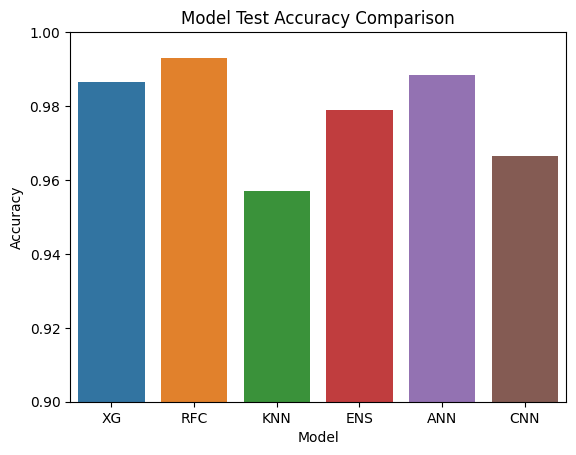

In [64]:
data = {
    'Model': ['XG', 'RFC', 'KNN', 'ENS', 'ANN', 'CNN'],
    'Accuracy': [xg_test_accu, rfc_test_accu, knn_test_accu, ens_test_accu, ann_test_accu, cnn_test_accu]
}
df = pd.DataFrame(data)

# Step 3: Plot the data
sns.barplot(x='Model', y='Accuracy', data=df)

# Step 4: Customize the plot
plt.title('Model Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)  # Assuming accuracy is between 0 and 1
plt.savefig('Media/09 - Test Accuray.png',dpi=1500,
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

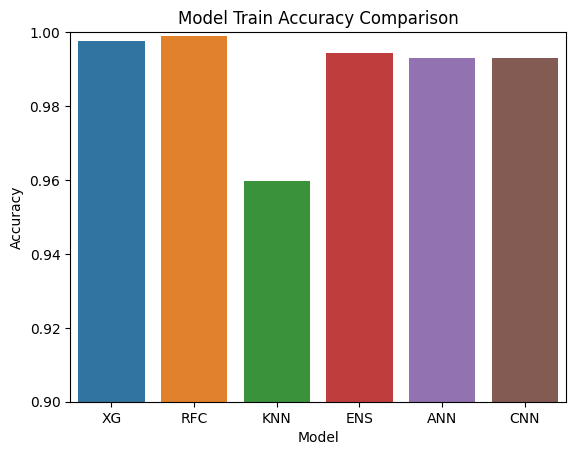

In [65]:
data = {
    'Model': ['XG', 'RFC', 'KNN', 'ENS', 'ANN', 'CNN'],
    'Accuracy': [xg_train_accu, rfc_train_accu, knn_train_accu, ens_train_accu, 
                 ann_train_accu, ann_train_accu]
}
df = pd.DataFrame(data)

# Step 3: Plot the data
sns.barplot(x='Model', y='Accuracy', data=df)

# Step 4: Customize the plot
plt.title('Model Train Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)  # Assuming accuracy is between 0 and 1
plt.savefig('Media/11 - Train Accuray.png',dpi=1500,
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

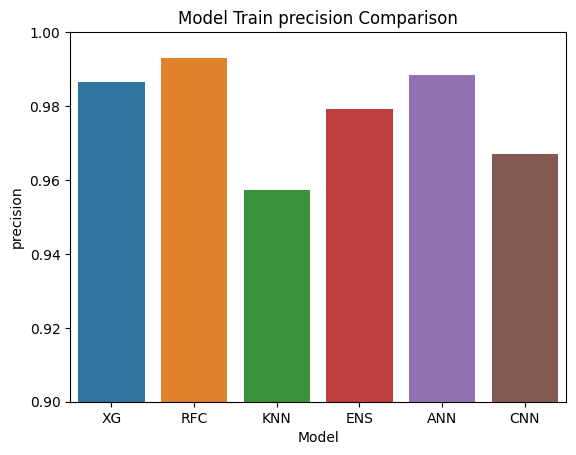

In [66]:
data = {
    'Model': ['XG', 'RFC', 'KNN', 'ENS', 'ANN', 'CNN'],
    'precision': [xg_precision, rfc_precision, 
                  knn_precision, ens_precision, 
                  ann_precision, cnn_precision]
}
df = pd.DataFrame(data)

# Step 3: Plot the data
sns.barplot(x='Model', y='precision', data=df)

# Step 4: Customize the plot
plt.title('Model Train precision Comparison')
plt.xlabel('Model')
plt.ylabel('precision')
plt.ylim(0.9, 1)  # Assuming precision is between 0 and 1
plt.savefig('Media/12 - precision.png',dpi=1500,
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

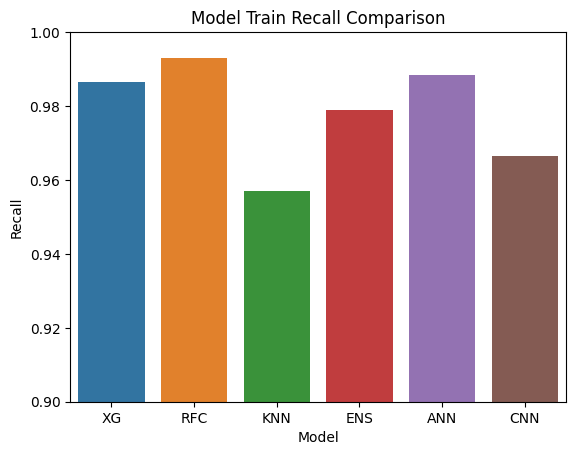

In [67]:
data = {
    'Model': ['XG', 'RFC', 'KNN', 'ENS', 'ANN', 'CNN'],
    'Recall': [xg_recall, rfc_recall, 
                  knn_recall, ens_recall, 
                  ann_recall, cnn_recall]
}
df = pd.DataFrame(data)

# Step 3: Plot the data
sns.barplot(x='Model', y='Recall', data=df)

# Step 4: Customize the plot
plt.title('Model Train Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0.9, 1)  # Assuming recall is between 0 and 1
plt.savefig('Media/13 - Recall.png',dpi=1500,
            bbox_inches ="tight",
            transparent = False
            )
plt.show()

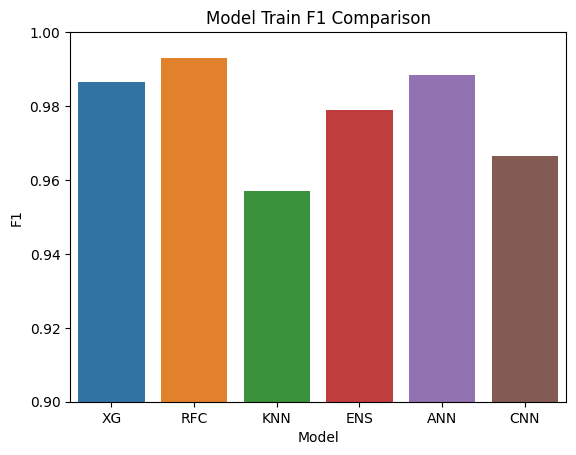

In [68]:
data = {
    'Model': ['XG', 'RFC', 'KNN', 'ENS', 'ANN', 'CNN'],
    'F1': [xg_f1, rfc_f1, 
                  knn_f1, ens_f1, 
                  ann_f1, cnn_f1]
}
df = pd.DataFrame(data)

# Step 3: Plot the data
sns.barplot(x='Model', y='F1', data=df)

# Step 4: Customize the plot
plt.title('Model Train F1 Comparison')
plt.xlabel('Model')
plt.ylabel('F1')
plt.ylim(0.9, 1)  # Assuming f1 is between 0 and 1
plt.savefig('Media/14 - f1.png',dpi=1500,
            bbox_inches ="tight",
            transparent = False
            )
plt.show()